<a href="https://colab.research.google.com/github/noelmt7/AML_LAB1/blob/main/2348538_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df = pd.read_csv("/content/Program_1_Dataset - Program_1_Dataset.csv")
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
df.shape

(506, 14)

In [4]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [5]:
df1 = df[['Avg_rooms','MValue' ]]

In [6]:
#Feature Variables
x1= df1['Avg_rooms'].values

#Target Variable
y1 = df1['MValue'].values

***Outlier Detection***

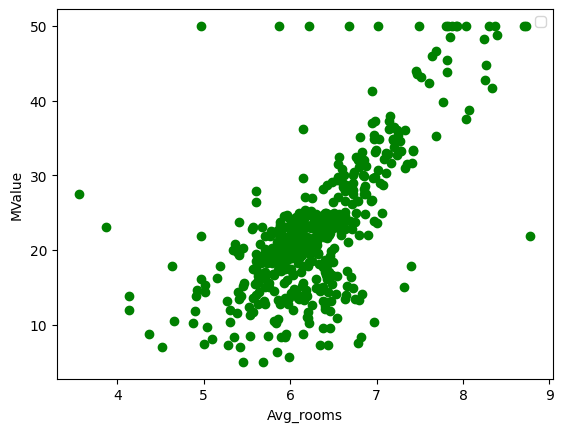

In [7]:
plt.scatter(x1,y1, c = 'green')

plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.legend()
plt.show()

In [8]:
from scipy.stats import zscore


zscore_df=df1.apply(zscore)



In [9]:

outlier=((zscore_df>3)|(zscore_df<-3)).sum()
outlier

Avg_rooms    8
MValue       0
dtype: int64

In [10]:
outlier_mask = (zscore_df > 3) | (zscore_df < -3)

outlier_rows = np.any(outlier_mask, axis=1)

cleaned_df = zscore_df[~outlier_rows]

In [11]:

outlier=((cleaned_df>3)|(cleaned_df<-3)).sum()
outlier

Avg_rooms    0
MValue       0
dtype: int64

In [12]:
#Feature Variables
x= cleaned_df['Avg_rooms'].values

#Target Variable
y = cleaned_df['MValue'].values

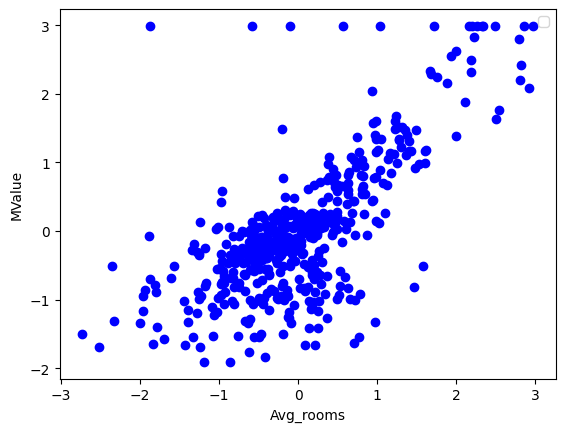

In [13]:
plt.scatter(x,y, c = 'blue')

plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.legend()
plt.show()

***Correlation between target and predictor variables***

In [14]:
subset_df = df[["Avg_rooms", "MValue"]]

corr_matrix = subset_df.corr()

<Axes: >

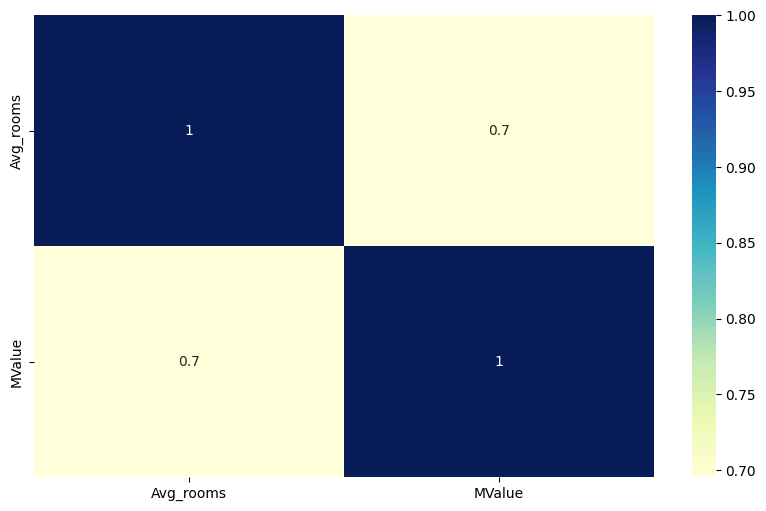

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot = True)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 42)

In [17]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## **Linear Regression**

Linear regression is a statistical method used for modeling the relationship between a continuous dependent variable and one or more independent variables. In linear regression, the goal is to find the best-fitting linear relationship (a line in the case of simple linear regression or a plane in multiple linear regression) that minimizes the sum of squared differences between the observed and predicted values. This method is commonly employed for both understanding the strength and direction of relationships between variables and making predictions based on those relationships

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [20]:
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')


Coefficient: 0.7663677622058942
Intercept: -0.003934385073695718


- The coefficient of 0.7664 represents the change in the dependent variable for a one-unit change in the independent variable.

- The intercept of -0.0039 is the value of the dependent variable when all independent variables are zero.

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
Y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, Y_train_pred)
r2_train = r2_score(y_train, Y_train_pred)

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

Y_test_pred = model.predict(x_test)

mse_test = mean_squared_error(y_test, Y_test_pred)
r2_test = r2_score(y_test, Y_test_pred)

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

Training Set Metrics:
Mean Squared Error: 0.4710810357595056
R-squared: 0.49921587307378623

Testing Set Metrics:
Mean Squared Error: 0.45698855923776716
R-squared: 0.5422713105782178



#### Training Set Metrics:
1. **Mean Squared Error (MSE):** The MSE on the training set is 0.4711. MSE represents the average squared difference between the actual and predicted values. A lower MSE indicates that the model's predictions are closer to the actual values on the training data.

2. **R-squared (R²):** The R-squared value on the training set is 0.4992. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A value closer to 1 suggests that the model explains a significant portion of the variability in the data.

#### Testing Set Metrics:
1. **Mean Squared Error (MSE):** The MSE on the testing set is 0.4570. Similar to the training set, a lower MSE on the testing set indicates that the model's predictions are, on average, closer to the actual values. It is essential to compare this value with the training set MSE to assess how well the model generalizes to new, unseen data.

2. **R-squared (R²):** The R-squared value on the testing set is 0.5423. A higher R-squared value suggests that the model performs reasonably well on the testing set, explaining a significant proportion of the variance. However, it's crucial to consider the balance between training and testing set performance to avoid overfitting or underfitting.

